In [4]:
import pandas as pd
import numpy as np


# check compatibility issues between seaborn and ptitprince
import seaborn as sns
import ptitprince as pt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import pingouin as pg
import statsmodels.api as sm
# import language_tool_python as ltp
import sys
sys.path.append('..')  
from src.visualization.plot import raincloud, raincloud2, RainCloud
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

#disable warnings
# outside of outdated, useless and annoying warnings
import warnings
warnings.filterwarnings('ignore')

    

In [5]:
stroop = pd.read_csv('STROOP.csv')
boxed  = pd.read_csv('BOXED.csv')

stroop['task'] = 'stroop'
boxed['task'] = 'boxed'

In [6]:
#merge the two datasets
df = pd.concat([stroop, boxed], axis=0)
df['participant_id'] = df['Participant Id']

stroop['participant_id'] = stroop['Participant Id']
boxed['participant_id'] = boxed['Participant Id']

# check how many participants are in both datasets
len(set(stroop['participant_id']).intersection(set(boxed['participant_id'])))

# print partipants that are in one dataset but not in the other
set(stroop['participant_id']).difference(set(boxed['participant_id']))


{'micah-t1_01AMCE25_31',
 'micah-t1_01CAJO04_01',
 'micah-t1_01CHCH22_01',
 'micah-t1_01PDP05_14',
 'micah-t1_01PEPR14_39',
 'micah-t1_01ROAM09_01',
 'micah-t1_01ReAN09_24',
 'micah-t1_01_15',
 'micah-t1_01desa25_39',
 'micah-t1_ID_18',
 'micah-t1_o1VePh15_38'}

In [7]:
df.participant_id

0          micah-t1_ClRo25_36
1          micah-t1_ClRo25_36
2          micah-t1_ClRo25_36
3          micah-t1_ClRo25_36
4          micah-t1_ClRo25_36
                 ...         
14592    micah-t1_02IVLA15_10
14593    micah-t1_02IVLA15_10
14594    micah-t1_02IVLA15_10
14595    micah-t1_02IVLA15_10
14596    micah-t1_02IVLA15_10
Name: participant_id, Length: 22789, dtype: object

In [8]:
df['rt'] = df['Response Time']  

# select only subjects are in both datasets
participants = set(stroop['participant_id']).intersection(set(boxed['participant_id']))
# print(participants)
df2 = df[df['participant_id'].isin(participants)]
# df.columns


<AxesSubplot: xlabel='task', ylabel='rt'>

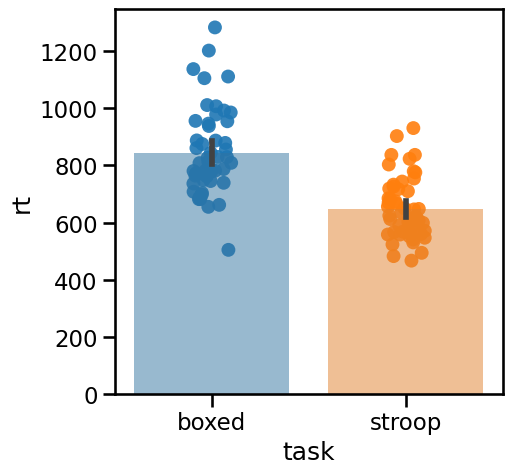

In [18]:
import seaborn as sns

avg = df2.groupby(['task', 'participant_id']).mean(numeric_only=True)

sns.set_context('talk')
plt.figure(figsize=(5, 5))
sns.barplot(data=avg, x='task', y='rt', alpha=0.5, zorder=1) 
sns.stripplot(data=avg, x='task', y='rt', alpha=0.9, jitter=True, edgecolor='white', size=10, zorder=-1)


